<a href="https://colab.research.google.com/github/sakib00007777/chat_bot/blob/main/rulebased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding ,LSTM ,Dense ,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt




In [30]:
%%writefile content.json
 {
  "intents": [
    {
      "tag": "greeting",
      "input": ["hello", "is there anyone?", "hi", "whats up", "how are you?"],
      "response": [
        "Hi! Welcome to the world's first space tour agency! I am Astral! How can I help you?",
        "Hey! Do you need any help?",
        "Welcome! How may I help you?",
        "Hey! How are you?"
      ]
    },
    {
      "tag": "goodbye",
      "input": ["thank you", "bye", "ok bye", "goodbye", "see you soon", "I will catch you later"],
      "response": [
        "Ok, bye!",
        "Have a nice day!",
        "Goodbye!",
        "I will miss you!",
        "Okay! Have a nice day!",
        "Take care, dear!"
      ]
    },
    {
      "tag": "where are you",
      "input": ["where are you from?", "which country are you from?", "where do you live?"],
      "response": [
        "I live in a space station!",
        "I am from space."
      ]
    }
  ]
}


Overwriting content.json


In [31]:
#importing the dataset

with open('content.json') as content:
    data1 = json.load(content)




In [32]:
#getting all the data to lists
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
   responses[intent['tag']]=intent['response']
   for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [33]:
#converting into dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [34]:
#removing punctuation from the data
import string
data['inputs'] =data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))


In [35]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train=le.fit_transform(data['tags'])


In [36]:
#define vocabulary
vocabulary=len(tokenizer.word_index)
print("number of unique words ", vocabulary)
output_length=le.classes_.shape[0]
print("output length " ,output_length)


number of unique words  26
output length  3


In [37]:
input_shape=x_train.shape[1]


In [38]:
#creating model



i=Input(shape=(input_shape,))
x = Embedding (vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x= Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)


In [39]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [55]:
#training the model
train=model.fit(x_train,y_train,epochs=200)


Epoch 1/200
1/1 [==============================] - 0s 18ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 11/200
1/1 [=

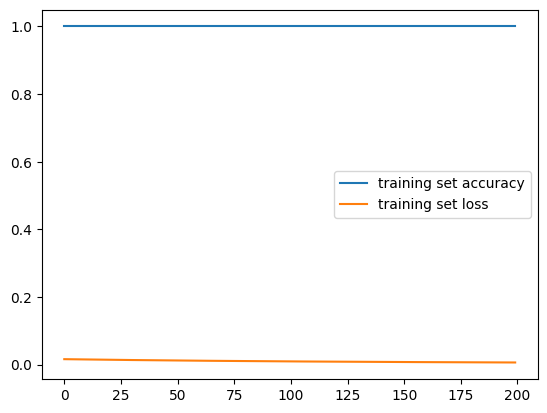

In [56]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [53]:
#chatting
import random
while True:
  texts_p=[]
  prediction_input=input('You :')
  #removing punctuation and converting into lower case
  prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input=''.join(prediction_input)
  texts_p.append(prediction_input)
  #tokenizing and padding
  prediction_input=tokenizer.texts_to_sequences(texts_p)
  prediction_input=np.array(prediction_input).reshape(-1)
  prediction_input=pad_sequences([prediction_input],input_shape)

  #getting output
  output =model.predict(prediction_input)
  output=output.argmax()
  #finding the right tag and predicting
  response_tag =le.inverse_transform([output])[0]
  print("Astral :" ,random.choice(responses[response_tag]))
  if response_tag=="goodbye":
    break


You :hi
1/1 [==============================] - 0s 29ms/step
Astral : Welcome! How may I help you?
You :which country are you from?
1/1 [==============================] - 0s 24ms/step
Astral : I live in a space station!
You :bye
1/1 [==============================] - 0s 26ms/step
Astral : Have a nice day!
